# Project description

Main goal:

Analyze the preferences of users who buy tickets to different destinations.
Study the database and analyze the demand of passengers for flights to cities where the cultural festivals take place.

Availible data:

**query_1.csv** — the result of the first request. It contains the following information:

- *model* — **aircraft model;
- *flights_amount* — number of flights for each aircraft model in September 2018

**query_3.csv** — the result of the third request. It contains the following information:

- *city* — city;
- *average_flights* — Average number of flights arriving in a city per day in September 2018.

 Tasks:


- Download required data and libraries;
- Study downloaded data;
- Carry out preprocessing;
- Choose the top 10 cities by the number of flights;
- Build graphs: aircraft models and the number of flights, cities and the number of flights, top 10 cities and the number of flights;
- Draw conclusions for each of the graphs, explain the result.


## Data download

Importing libraries.

In [1]:
#pip install -U pandasql

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

Importing files.

In [3]:
query_1 = pd.read_csv(r'C:\Users\Рус\Desktop\python\DS_Datasets\DS_14_SQL\query_1.csv')
query_3 = pd.read_csv(r'C:\Users\Рус\Desktop\python\DS_Datasets\DS_14_SQL\query_3.csv')

## Preprocessing

Studying data.

In [4]:
print('\nquery_1\n')

print(query_1.head(8))
print('\n')
print(query_1.describe())

print('\nquery_3\n')

print(query_3.head(5))
print('\n')
print(query_3.describe())


query_1

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185


       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000

query_3

          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613


       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


There are no gaps, a large scatter of data. Now let's check the data type. 

In [5]:
query_1.dtypes

model             object
flights_amount     int64
dtype: object

In [6]:
query_3.dtypes

city                object
average_flights    float64
dtype: object

In [7]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


All right. Let's move on to analytics.

## Analytics

In [9]:
query_3_sql = sqldf('SELECT * FROM query_3 ORDER BY average_flights DESC LIMIT 10')

In [10]:
query_3_sql

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


<AxesSubplot:xlabel='city'>

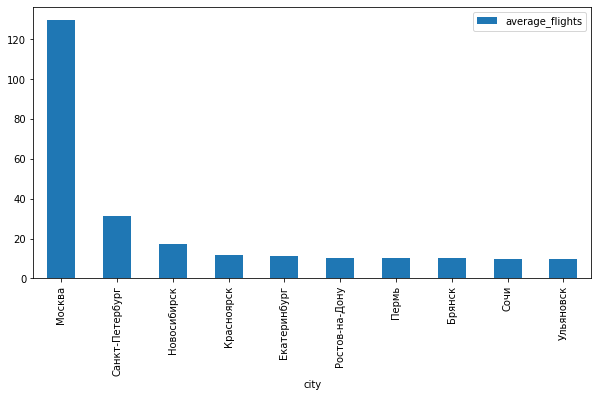

In [11]:
query_3_sql.plot(kind = 'bar', x = 'city', figsize=(10, 5), fontsize=10)

The graph also shows the dominance of Moscow over other cities.

<AxesSubplot:xlabel='model'>

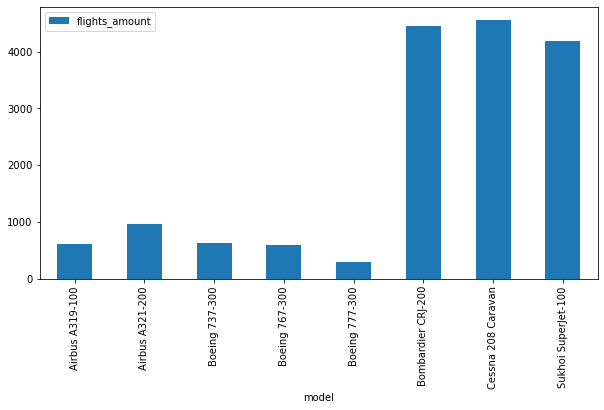

In [12]:
query_1.plot(kind = 'bar', x = 'model', figsize=(10, 5), fontsize=10)

The graph highlights the 3 most popular models: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.

Now let's make a graph of the number of flights for all cities.

<AxesSubplot:xlabel='city'>

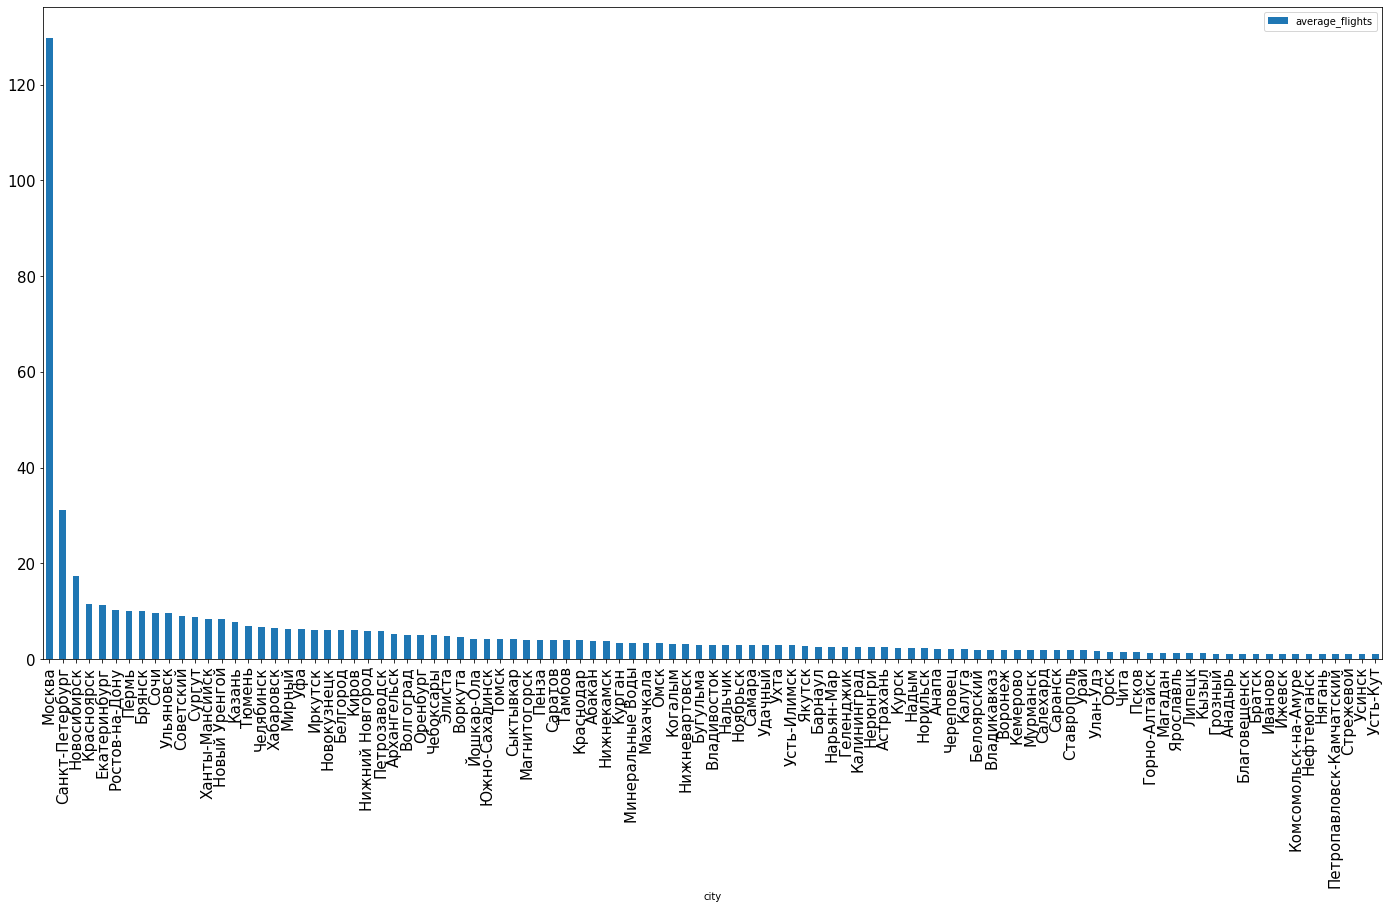

In [13]:
query_3all = sqldf("SELECT * FROM query_3 ORDER BY average_flights DESC")
query_3all.plot(kind = 'bar', x = 'city', figsize=(24, 12), fontsize=15)

## Conclusion

As expected, Moscow was the busiest city in terms of flights. Ust-Kut became the least loaded. The most popular aircraft model is the Cessna 208 Caravan. The least popular is the Boeing 777-300.